## 0) Loading Data

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error


data = pd.read_csv("winequality-red.csv", sep=";")

X = data.drop("quality", axis=1)
y = data["quality"]

## Exercise 1

/home/joselopes/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joselopes/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joselopes/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joselopes/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joselopes/.local/lib/python3.1

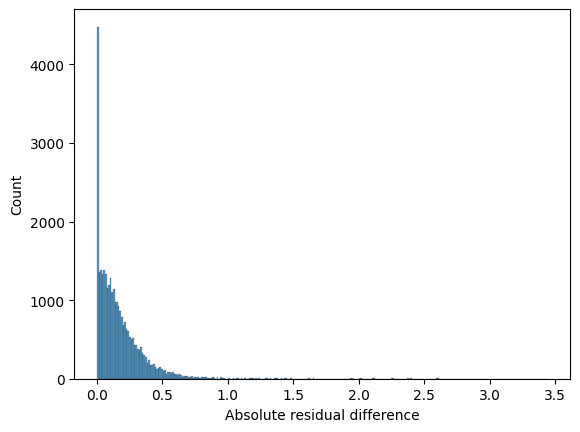

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

regressor_pred = []
residues = []
normal_MAE = [] ## this is for exercise 2
for i in range(1, 11):
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", early_stopping=True, validation_fraction=0.2, random_state=i)
    mlp_regressor.fit(X_train, y_train)
    y_pred = mlp_regressor.predict(X_test)
    normal_MAE.append(mean_absolute_error(y_test, y_pred))
    regressor_pred.append(y_pred)

normal_MEA = np.array(normal_MAE)
for prediction in regressor_pred:
    residue = list(map(lambda x: abs(x) , prediction - regressor_pred))
    residues.append(residue)

residues = np.array(residues).flatten()
sns.histplot(data=residues)
plt.xlabel("Absolute residual difference")
plt.show()

## Exercise 2

In [29]:
def round_bound(x):
    new_x = round(x)
    if new_x < 0:
        return 0
    if new_x > 10:
        return 10
    return new_x

rounded_MAE = []

for prediction in regressor_pred: 
    new_y_pred = list(map(lambda x: round_bound(x), prediction))
    rounded_MAE.append(mean_absolute_error(y_test, new_y_pred))

rounded_MAE = np.array(rounded_MAE)
normal_MAE - rounded_MAE

array([0.04089862, 0.02352218, 0.0707143 , 0.04051755, 0.06703167,
       0.04069798, 0.05529944, 0.05656633, 0.04636283, 0.06777581])

From what we can see, rouning and bounding the estimates had a positive impact in the learnt MLP regressor, since the MAE for the rounded estimates is lower than the normal one.

## Exercise 3